<a href="https://colab.research.google.com/github/shaileshag1/Image-Recognizer/blob/main/Copy_of_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2025-04-14 06:20:44--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.64.64
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs231n.stanford.edu/tiny-imagenet-200.zip [following]
--2025-04-14 06:20:44--  https://cs231n.stanford.edu/tiny-imagenet-200.zip
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  65.7MB/s    in 3.8s    

2025-04-14 06:20:48 (62.5 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
!unzip tiny-imagenet-200.zip

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

In [ ]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
import os

train_dir = "tiny-imagenet-200/train"
val_dir = "tiny-imagenet-200/val"

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))

Train directory exists: True
Validation directory exists: True


In [ ]:
# Define transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
data_dir = 'tiny-imagenet-200'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))

# Compute class weights to handle imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_dataset.targets),
    y=train_dataset.targets
)
class_weights = torch.tensor(class_weights, dtype=torch.float).cpu()  # Move to CPU

# Define device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Initialize MobileNetV2 (simpler model)
model = models.mobilenet_v2(pretrained=True)
num_ftrs = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.5),  # Dropout layer
    nn.Linear(num_ftrs, 200)  # Output layer for 200 classes
)
model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 156MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
# Define Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = nn.CrossEntropyLoss(weight=class_weights.to(device) if device.type == 'cuda' else class_weights, reduction='none')(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt)**self.gamma * ce_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        return focal_loss

criterion = FocalLoss(alpha=0.25, gamma=2)

# Define optimizer and scheduler
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50, Loss: 1.0436, Train Acc: 11.45%, Val Acc: 0.32%
Epoch 2/50, Loss: 0.8713, Train Acc: 21.02%, Val Acc: 0.19%
Epoch 3/50, Loss: 0.8213, Train Acc: 24.70%, Val Acc: 0.27%
Epoch 4/50, Loss: 0.7847, Train Acc: 27.23%, Val Acc: 0.34%
Epoch 5/50, Loss: 0.7704, Train Acc: 28.57%, Val Acc: 0.30%
Epoch 6/50, Loss: 0.7522, Train Acc: 29.84%, Val Acc: 0.35%
Epoch 7/50, Loss: 0.7432, Train Acc: 30.58%, Val Acc: 0.35%
Epoch 8/50, Loss: 0.7292, Train Acc: 31.56%, Val Acc: 0.40%
Epoch 9/50, Loss: 0.7185, Train Acc: 32.54%, Val Acc: 0.37%
Epoch 10/50, Loss: 0.7121, Train Acc: 32.95%, Val Acc: 0.37%
Epoch 11/50, Loss: 0.7111, Train Acc: 33.21%, Val Acc: 0.52%
Epoch 12/50, Loss: 0.6989, Train Acc: 33.92%, Val Acc: 0.37%
Epoch 13/50, Loss: 0.6908, Train Acc: 34.11%, Val Acc: 0.36%
Epoch 14/50, Loss: 0.6857, Train Acc: 34.52%, Val Acc: 0.39%
Epoch 15/50, Loss: 0.6518, Train Acc: 37.27%, Val Acc: 0.38%
Epoch 16/50, Loss: 0.6407, Train Acc: 38.19%, Val Acc: 0.38%
Epoch 17/50, Loss: 0.6321, Train 

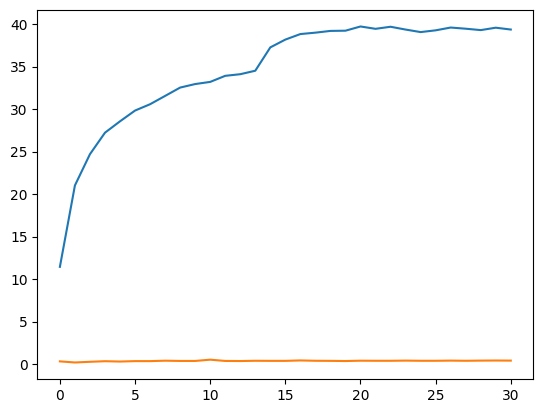

In [ ]:
# Early stopping parameters
patience = 20
best_val_accuracy = 0.0
epochs_without_improvement = 0
train_accuracies = []
val_accuracies = []

# Mixup Regularization
def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Training function with early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50):
    global best_val_accuracy, epochs_without_improvement
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training loop with Mixup
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Apply Mixup
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (lam * (preds == targets_a).sum().float() +
                             (1 - lam) * (preds == targets_b).sum().float()).item()

        # Calculate training accuracy
        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (preds == labels).sum().item()

        # Calculate validation accuracy
        val_accuracy = 100 * correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Print results
        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Loss: {running_loss/len(train_loader):.4f}, "
              f"Train Acc: {train_accuracy:.2f}%, "
              f"Val Acc: {val_accuracy:.2f}%")

        # Update learning rate scheduler
        scheduler.step(val_accuracy)

        # Check for early stopping
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), 'mobilenetv2_tinyimagenet_best.pth')  # Save best model
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print("Early stopping triggered.")
            break

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50)

# Plot accuracies
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')

In [ ]:
model.load_state_dict(torch.load('mobilenetv2_tinyimagenet_best.pth'))
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
from PIL import Image

# Load ImageNet class labels
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform_test = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        label = idx_to_class[predicted.item()]
    return label

In [ ]:
import openai

openai.api_key = "your-api-key"  # Load securely in real use!

def generate_gpt_response(label):
    prompt = f"Explain what '{label}' is in simple terms, and mention its common uses or where it's found."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # or "gpt-4" if available
        messages=[{"role": "user", "content": prompt}],
        max_tokens=100,
        temperature=0.7
    )
    return response['choices'][0]['message']['content']

In [ ]:
def chatbot_response(image_path):
    label = predict_image(image_path)
    gpt_output = generate_gpt_response(label)
    return f"Prediction: {label}\n\nExplanation: {gpt_output}"

In [ ]:
import streamlit as st
import torch
import torchvision.transforms as transforms
from PIL import Image
import openai
from torchvision import models
import os

# Set OpenAI key (replace with st.secrets in production)
openai.api_key = "your-openai-api-key"

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.mobilenet_v2(pretrained=True)
num_ftrs = model.classifier[1].in_features
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(num_ftrs, 200)  # Tiny ImageNet has 200 classes
)
model.load_state_dict(torch.load("mobilenetv2_tinyimagenet_best.pth", map_location=device))
model.to(device)
model.eval()

# Load class labels
def load_class_labels(data_dir='tiny-imagenet-200'):
    idx_to_class = {}
    with open(os.path.join(data_dir, 'words.txt'), 'r') as f:
        for line in f:
            wnid, label = line.strip().split('\t')
            idx_to_class[wnid] = label
    train_folder = os.path.join(data_dir, 'train')
    folder_names = sorted(os.listdir(train_folder))
    id_to_label = {i: idx_to_class[folder] for i, folder in enumerate(folder_names)}
    return id_to_label

id_to_label = load_class_labels()

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Prediction function
def predict_image(img):
    img = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img)
        _, pred = torch.max(output, 1)
        return pred.item()

# GPT response function
def generate_gpt_response(label):
    prompt = f"Explain what a '{label}' is in simple words. Mention its use or where it's found."
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=100,
        temperature=0.7,
    )
    return response['choices'][0]['message']['content']

# Streamlit UI
st.title("🖼️ Conversational Image Recognition Chatbot")
st.caption("Upload an image. I’ll tell you what it is — and GPT will explain it in plain English!")

uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    if st.button("Predict and Explain"):
        with st.spinner("Analyzing image..."):
            pred_idx = predict_image(image)
            label = id_to_label.get(pred_idx, "Unknown Object")
            explanation = generate_gpt_response(label)

        st.subheader(f"Prediction: {label}")
        st.info(explanation)


2025-04-12 17:34:28.748 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 17:34:28.837 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-12 17:34:28.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 17:34:28.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 17:34:28.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 17:34:28.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 17:34:28.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 17:34:28.843 Thread 'MainThread': mi